<a href="https://colab.research.google.com/github/kkarp9/CYSE635-Group7-DataBusters/blob/main/src/Data_Busters_CYSE635_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Busters - Not Demure, Not Mindful (Group 9): Data Poisoning Attack
## Macky Castro and Kurt Karpin
## CYSE 635

# Part 1: Email Dataset Setup

**Import All Applicable Libraries for Project**

In [1]:
import pandas as pd # pandas is used to deal with datasets, dataframes
import numpy as np # deal to numbers and large arrays
import matplotlib.pyplot as plt # to draw any plot
import seaborn as sns # to draw any plot
import warnings
from sklearn.preprocessing import LabelEncoder
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC


**Check if running on Google Collab or Locally such as VScode**

In [2]:
from google.colab import files
environment = 0
while environment != '1' or environment != '2':
  environment = input('Press 1 if this is running on Google Collab or 2 if running locally.')
  if environment == '1' or environment == '2':
    break
  else:
    print('Invalid Input. Please try again.')
if environment == '1':
  uploaded = files.upload()

Press 1 if this is running on Google Collab or 2 if running locally.1


Saving Phishing_Email.csv to Phishing_Email.csv


**Check the current working directory using os.getcwd() and check all the files in the /content/ directory**


In [3]:
import os

curr_dir = os.getcwd()
print(curr_dir)



/content


In [4]:
ls -al /content/

total 50832
drwxr-xr-x 1 root root     4096 Dec  4 16:23 ./
drwxr-xr-x 1 root root     4096 Dec  4 16:20 ../
drwxr-xr-x 4 root root     4096 Dec  2 14:21 .config/
-rw-r--r-- 1 root root 52034604 Dec  4 16:23 Phishing_Email.csv
drwxr-xr-x 1 root root     4096 Dec  2 14:21 sample_data/


**Read the Phishing CSV files from the `/content/` directory**

In [5]:
if environment == '1':
  df = pd.read_csv('/content/Phishing_Email.csv')
else:
  # assumes csv file is in the same directory locally as this notebook file
  df = pd.read_csv('Phishing_Email.csv')

print(f'Email shape: {df.shape}')
print(f'Top 5 rows of emails:\n {df.head(5)}')
df.columns

Email shape: (18650, 3)
Top 5 rows of emails:
    Unnamed: 0                                         Email Text  \
0           0  re : 6 . 1100 , disc : uniformitarianism , re ...   
1           1  the other side of * galicismos * * galicismo *...   
2           2  re : equistar deal tickets are you still avail...   
3           3  \nHello I am your hot lil horny toy.\n    I am...   
4           4  software at incredibly low prices ( 86 % lower...   

       Email Type  
0      Safe Email  
1      Safe Email  
2      Safe Email  
3  Phishing Email  
4  Phishing Email  


Index(['Unnamed: 0', 'Email Text', 'Email Type'], dtype='object')

**Clean up DataFrame**

In [6]:
df = df.drop(labels = ['Unnamed: 0'], axis = 1)
print(f'Updated Email shape: {df.shape}')
print(f'Updated Top 5 rows of emails:\n {df.head(5)}')

og_size = len(df)
# drop empty and duplicated email entries
df = df.dropna()
df = df.drop_duplicates()
print(f'Post Clean Email shape: {df.shape}')

curr_size = len(df)
print(f'Size Difference: {og_size - curr_size}')
print(f'Rate of Data Loss: {(og_size - curr_size) / og_size}')


Updated Email shape: (18650, 2)
Updated Top 5 rows of emails:
                                           Email Text      Email Type
0  re : 6 . 1100 , disc : uniformitarianism , re ...      Safe Email
1  the other side of * galicismos * * galicismo *...      Safe Email
2  re : equistar deal tickets are you still avail...      Safe Email
3  \nHello I am your hot lil horny toy.\n    I am...  Phishing Email
4  software at incredibly low prices ( 86 % lower...  Phishing Email
Post Clean Email shape: (17538, 2)
Size Difference: 1112
Rate of Data Loss: 0.05962466487935657


**Confirm the Labels Under Set**


This shows that there are only 2 unique labels meaning this is a binary classification.

In [7]:
email_types = df['Email Type'].unique()

print(f"Unique Email Labels:\n{email_types}")

Unique Email Labels:
['Safe Email' 'Phishing Email']


**Data Visualization**

Pie Chart to see how many Phishing and Safe emails are there.

Pie Chart of Safe and Phishing Emails


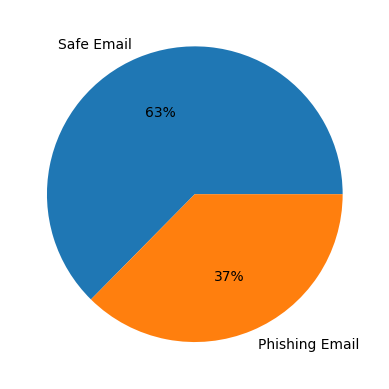

In [8]:
print('Pie Chart of Safe and Phishing Emails')
ratio = df['Email Type'].value_counts()
plt.pie(ratio, labels = ratio.index, autopct = '%1.0f%%')

plt.show()

**Bar Chart Visualization**

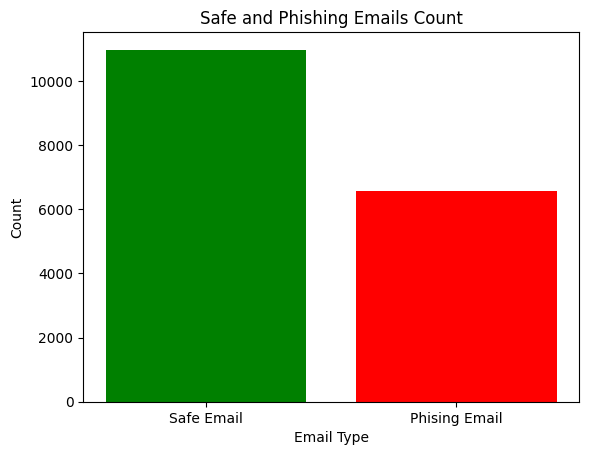

In [9]:
plt.bar(['Safe Email', 'Phising Email'], [(df['Email Type'] == 'Safe Email').sum(), (df['Email Type'] == 'Phishing Email').sum()], color=['green', 'red'])
plt.xlabel('Email Type')
plt.ylabel('Count')
plt.title('Safe and Phishing Emails Count')
plt.show()

**Label Encoding**

# Part 2: Initial Machine Learning Model

In [33]:
# split Email Type column to model

X = df['Email Text'].values
Y = df['Email Type'].values
print(X.shape)
print(Y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state = 101)
print("\n X_train Shape: ", X_train.shape)

print("\n X_test Shape: ", X_test.shape)

print("\n y_train  Shape: ", y_train.shape)
print("\n y_test Shape: ", y_test.shape)

(17538,)
(17538,)

 X_train Shape:  (14030,)

 X_test Shape:  (3508,)

 y_train  Shape:  (14030,)

 y_test Shape:  (3508,)


In [34]:
# Importing Libraries for the model ,Tfidf and Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

# define the Classifier
classifier = Pipeline([("tfidf",TfidfVectorizer() ),("classifier",RandomForestClassifier(n_estimators=10))])

In [35]:
# Trian Our model
classifier.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', RandomForestClassifier(n_estimators=10))])

In [36]:
y_pred = classifier.predict(X_test)

In [37]:
#accuracy_score
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 95.01%


In [38]:
#confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[1234   84]
 [  91 2099]]


In [39]:
#classification_report
cr = classification_report(y_test,y_pred)
print(cr)

                precision    recall  f1-score   support

Phishing Email       0.93      0.94      0.93      1318
    Safe Email       0.96      0.96      0.96      2190

      accuracy                           0.95      3508
     macro avg       0.95      0.95      0.95      3508
  weighted avg       0.95      0.95      0.95      3508



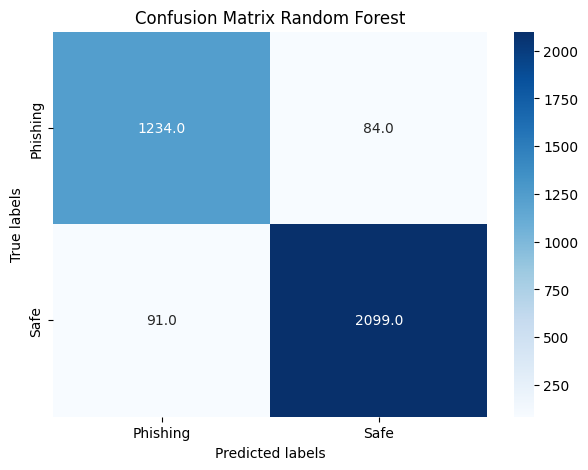

In [40]:
labels = ['Phishing', 'Safe']

plt.figure(figsize=(7,5))
ax= plt.subplot()
sns.heatmap(cm,cmap="Blues",annot=True,fmt='.1f', ax = ax);

# labels, title and ticks

ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix Random Forest');

**Training Support Vector Machine**

In [41]:
classifier_svm = Pipeline([("tfidf",TfidfVectorizer() ),("classifier",SVC(kernel='rbf', random_state=0))])
classifier_svm.fit(X_train,y_train)


Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', SVC(random_state=0))])

**SVM Model Evaluation**

Accuracy: 98.49%
[[1290   28]
 [  25 2165]]
Classification Report:
                 precision    recall  f1-score   support

Phishing Email       0.98      0.98      0.98      1318
    Safe Email       0.99      0.99      0.99      2190

      accuracy                           0.98      3508
     macro avg       0.98      0.98      0.98      3508
  weighted avg       0.98      0.98      0.98      3508



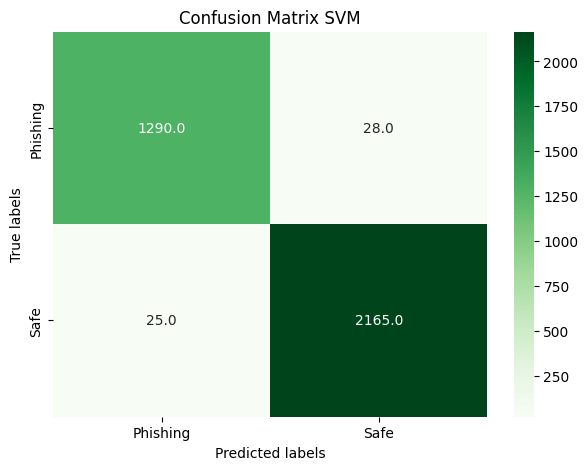

In [42]:
y_pred_svm = classifier_svm.predict(X_test)
svm_accuracy = accuracy_score(y_test, y_pred_svm)

print("Accuracy: %.2f%%" % (svm_accuracy * 100.0))

cm_svm = confusion_matrix(y_test, y_pred_svm)
print(cm_svm)

cf_report_svm = classification_report(y_test, y_pred_svm)
print("Classification Report:\n", cf_report_svm)


plt.figure(figsize=(7,5))
ax= plt.subplot()
sns.heatmap(cm_svm,cmap="Greens",annot=True,fmt='.1f', ax = ax);

# labels, title and ticks

ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix SVM');

plt.show()

**Accuracy Comparison Between Random Forest and Support Vector Machine**

RF Accuracy: 0.9501140250855188
SVM Accuracy: 0.9848916761687572


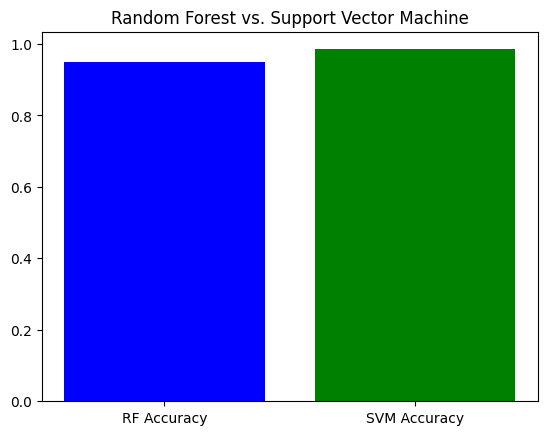

In [43]:
print('RF Accuracy:', accuracy)
print('SVM Accuracy:', svm_accuracy)
plt.bar(['RF Accuracy', 'SVM Accuracy'], [accuracy, svm_accuracy], color=['blue', 'green'])
plt.title('Random Forest vs. Support Vector Machine')
plt.show()

# Part 3 Data Poisoning Attack

This section will cover Data Poisoning attack on the given phisihing email data set. In this attack, there will be 2 different approaches of attacking:

1. Adding rows with flipped labels
2. Change the tokenization via changing keywords that would tamper tokenization with tfidvectorizer.

## Approach 1: Adding rows with flipped labels

**Check Train Datasets**

In [54]:
print("\n X_train Shape: ", X_train.shape)
print("\n y_train  Shape: ", y_train.shape)
print("\n Top 5 rows of X_train: ", X_train[:5])
print("\n Top 5 labels of y_train: ", y_train[:5])


 X_train Shape:  (14030,)

 y_train  Shape:  (14030,)

 Top 5 rows of X_train:  ["\nShopper Newsletter: AlertsJuly 18, 2002 \nFrom Computers4Sure.com iRiver's versatile SlimX just $149 \n From CDW Apple's groundbreaking iPod just $399Computers4Sure\n \n \niRiver SlimX iMP-350 \n\t\t\t\t\t\t\t\tâ€¢ Ultra-slim, 16.7mm in width\n\t\t\t\t\t\t\t\tâ€¢ Supports MP3/WMA/ASF/CD formats\n\t\t\t\t\t\t\t\tâ€¢ Rechargeable batteries included\n\t\t\t\t\t\t\t\tÂ\xa0Â\xa0Just $149\nSonicblue Rio Riot\n\t\t\t\t\t\t\t\tâ€¢ Stores over 400 complete albums \n\t\t\t\t\t\t\t\tâ€¢ Built-in FM tuner/custom presets\n\t\t\t\t\t\t\t\tâ€¢ Extra-large, backlit LCD \n\t\t\t\t\t\t\t\tÂ\xa0Â\xa0Just $300\nTDK Mojo CD-MP3\n\t\t\t\t\t\t\t\tâ€¢ Play up to 10 hours of music\n\t\t\t\t\t\t\t\tâ€¢ 8-minute MP3 skip protection\n\t\t\t\t\t\t\t\tâ€¢ Supports MP3, Audio CD\n\t\t\t\t\t\t\t    Â\xa0Â\xa0Just $125\nSonicblue Rio 600 (32MB)\n\t\t\t\t\t\t\t\tâ€¢ Customize your music!\n\t\t\t\t\t\t\t\tâ€¢ 32MB, supports MP3 and WMA\

**Create a Dictionary Set of Training Datapoints**

A dictionary is provided where malicious training data points are added in increments of 1500 up to doubling the training set with half of the labels being swapped.

In [55]:
mal_dic = {}
# 'Safe Email', 'Phishing Email'
# adding 50% more rows ends up in >10 mins runtime
print('X_train size:', len(X_train))
max_poison = len(X_train)
for i in range(7000, max_poison, 7000):
    # copy 1st i rows from X_train
    ap1_mal_X = X_train[:i]
    # copy 1st i labels from y_train
    ap1_mal_y = y_train[:i]
    # change 'Safe Email' to 'Phishing Email' and vice versa for mal_y
    ap1_mal_y = np.where(ap1_mal_y == 'Safe Email', 'Phishing Email', 'Safe Email')
    # add mal_X to X_train and mal_y to y_train (copied for reference)
    X_poisoned_train = np.concatenate([X_train, ap1_mal_X])
    y_poisoned_train = np.concatenate((y_train, ap1_mal_y))
    num_rows = 0
    if i > len(y_train):
        num_rows = len(y_train)
    else:
        num_rows = i
    mal_dic[num_rows] = {
        "X_train": X_poisoned_train,
        "y_train": y_poisoned_train
    }
    print('Current increment:', num_rows, '|', "X_train Shape: ", X_poisoned_train.shape, '|', "y_train  Shape: ", y_poisoned_train.shape)

X_train size: 14030
Current increment: 7000 | X_train Shape:  (21030,) | y_train  Shape:  (21030,)
Current increment: 14000 | X_train Shape:  (28030,) | y_train  Shape:  (28030,)


**Train Random Forest with Poisoned Trained Datset**

In [56]:
rf_poison_dic = {}
rf_poison_cm_dic = {}
for key in mal_dic.keys():
  poison_classifier = Pipeline([("tfidf",TfidfVectorizer() ),("classifier",RandomForestClassifier(n_estimators=10))])
  poison_classifier.fit(mal_dic[key]["X_train"], mal_dic[key]["y_train"])
  y_poison_pred_rf = poison_classifier.predict(X_test)

  rf_poison_cm_dic[key] = confusion_matrix(y_test,y_poison_pred_rf)
  rf_poison_dic[key] = accuracy_score(y_test,y_poison_pred_rf)
  print('Current Iteration:', key, 'added rows.')
  print("Accuracy: %.2f%%" % (rf_poison_dic[key] * 100.0))
  # 50 - 60 minutes to complete for 50% added rows and 100% added rows entries

Current Iteration: 7000 added rows.
Accuracy: 84.69%
Current Iteration: 14000 added rows.
Accuracy: 50.11%


**Analysis of Accuracies**

Accuracy Comparison - Total Time Ran for Approach 1 Data Poison: 57 minutes


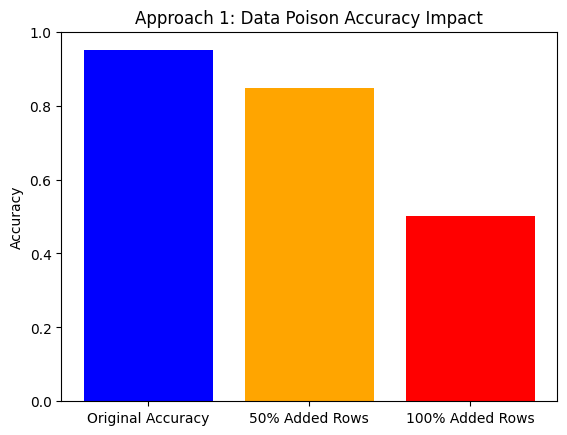

In [57]:
print('Accuracy Comparison - Total Time Ran for Approach 1 Data Poison: 57 minutes')
plt.bar(['Original Accuracy', '50% Added Rows', '100% Added Rows'], [accuracy, rf_poison_dic[7000], rf_poison_dic[14000]], color=['blue', 'orange', 'red'])
plt.ylim(0, 1.0)
plt.title('Approach 1: Data Poison Accuracy Impact')
plt.ylabel('Accuracy')
plt.show()

**Confusion Matrix of 50% Added Rows**

Random Forest Accuracy: 0.8469213226909921


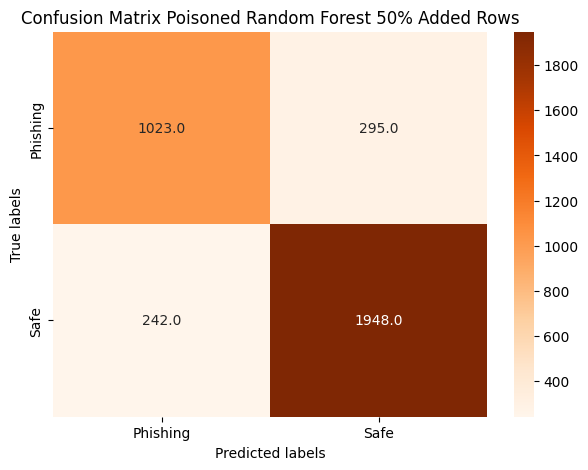

In [58]:
plt.figure(figsize=(7,5))
ax= plt.subplot()
sns.heatmap(rf_poison_cm_dic[7000],cmap="Oranges",annot=True,fmt='.1f', ax = ax);

# labels, title and ticks
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix Poisoned Random Forest 50% Added Rows');
print('Random Forest Accuracy:', rf_poison_dic[7000])

**Confusion Matrix of 100% Added Rows (Lowest Accuracy)**

Random Forest Accuracy: 0.5011402508551881


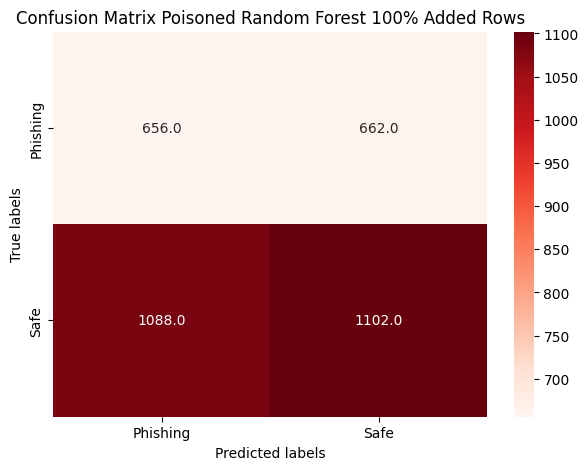

In [59]:
plt.figure(figsize=(7,5))
ax= plt.subplot()
sns.heatmap(rf_poison_cm_dic[14000],cmap="Reds",annot=True,fmt='.1f', ax = ax);

# labels, title and ticks
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix Poisoned Random Forest 100% Added Rows');
print('Random Forest Accuracy:', rf_poison_dic[14000])

**Training SVM Model with Poisoned Dataset**

In [60]:
svm_poison_dic = {}
svm_poison_cm_dic = {}
half = 7000
poison_classifier = Pipeline([("tfidf",TfidfVectorizer() ),("classifier",SVC(kernel='rbf', random_state=0))])
poison_classifier.fit(mal_dic[half]["X_train"], mal_dic[half]["y_train"])
y_poison_pred_svm = poison_classifier.predict(X_test)

svm_poison_cm_dic[half] = confusion_matrix(y_test,y_poison_pred_svm)
svm_poison_dic[half] = accuracy_score(y_test,y_poison_pred_svm)
print('Current Iteration:', half, 'added rows.')
print("Accuracy: %.2f%%" % (svm_poison_dic[half] * 100.0))
# 57 minutes to complete for 50% added rows and 100% added rows entries
# 18 minute Run

Current Iteration: 7000 added rows.
Accuracy: 97.81%


**SVM - Confusion Matrix of 50% Added Rows**

SVM Accuracy: 0.9780501710376283


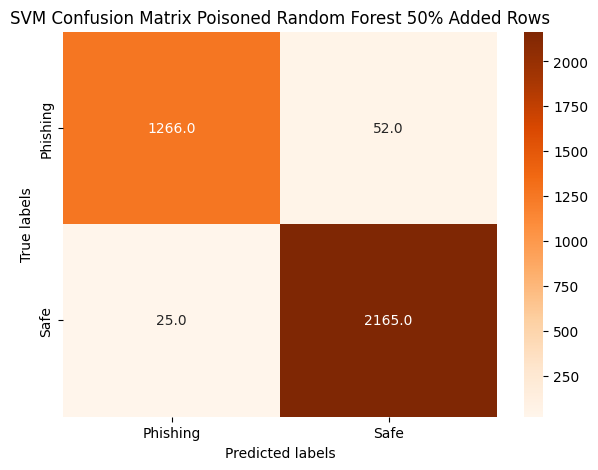

In [62]:
plt.figure(figsize=(7,5))
ax= plt.subplot()
sns.heatmap(svm_poison_cm_dic[7000],cmap="Oranges",annot=True,fmt='.1f', ax = ax);

# labels, title and ticks
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('SVM Confusion Matrix Poisoned Random Forest 50% Added Rows');
print('SVM Accuracy:', svm_poison_dic[7000])

**SVM Poison Model Train on 100% Added Rows**

In [65]:
full = 14000
poison_classifier = Pipeline([("tfidf",TfidfVectorizer() ),("classifier",SVC(kernel='rbf', random_state=0))])
poison_classifier.fit(mal_dic[full]["X_train"], mal_dic[full]["y_train"])
y_poison_pred_svm = poison_classifier.predict(X_test)

svm_poison_cm_dic[full] = confusion_matrix(y_test,y_poison_pred_svm)
svm_poison_dic[full] = accuracy_score(y_test,y_poison_pred_svm)
print('Current Iteration:', full, 'added rows.')
print("Accuracy: %.2f%%" % (svm_poison_dic[full] * 100.0))
# 57 minutes to complete for 50% added rows and 100% added rows entries
# 18 minute Run

Current Iteration: 14000 added rows.
Accuracy: 62.57%


**SVM - Confusion Matrix of 100% Added Rows**

SVM Accuracy: 0.6257126567844926


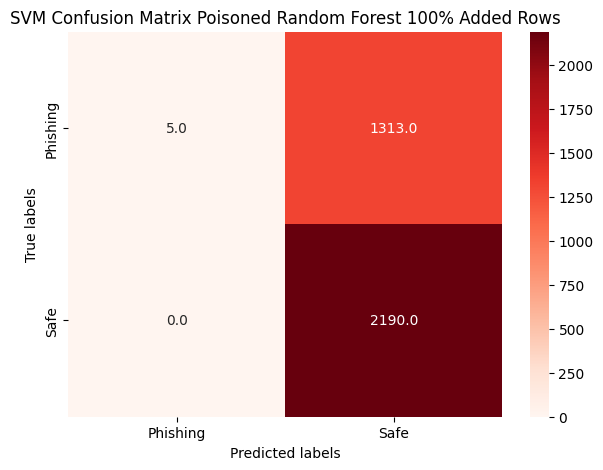

In [66]:
plt.figure(figsize=(7,5))
ax= plt.subplot()
sns.heatmap(svm_poison_cm_dic[14000],cmap="Reds",annot=True,fmt='.1f', ax = ax);

# labels, title and ticks
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('SVM Confusion Matrix Poisoned Random Forest 100% Added Rows');
print('SVM Accuracy:', svm_poison_dic[14000])

**SVM Accuracy Comparison**

SVM Accuracy Comparison - Total Time Ran for Approach 1 Data Poison: 57 minutes


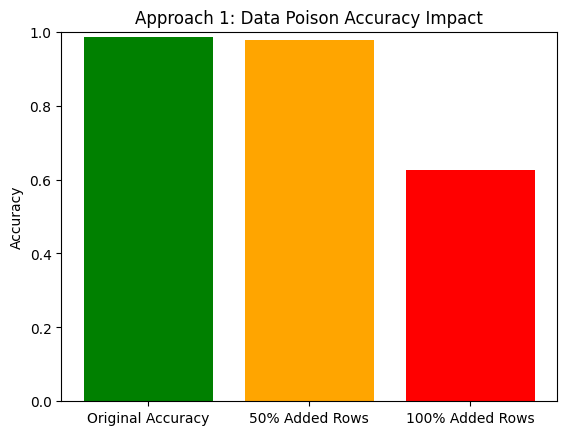

In [82]:
print('SVM Accuracy Comparison - Total Time Ran for Approach 1 Data Poison: 57 minutes')
plt.bar(['Original Accuracy', '50% Added Rows', '100% Added Rows'], [svm_accuracy, svm_poison_dic[7000], svm_poison_dic[14000]], color=['green', 'orange', 'red'])
plt.ylim(0, 1.0)
plt.title('Approach 1: Data Poison Accuracy Impact')
plt.ylabel('Accuracy')
plt.show()

**Double Bar Graph Comparison of RF and SVM**

[0 1]


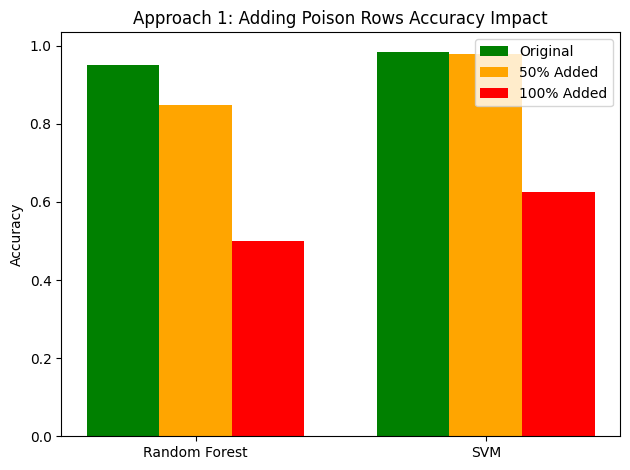

In [96]:
categories = ['Random Forest', 'SVM']
values1 = [accuracy, svm_accuracy]
values2 = [rf_poison_dic[7000], svm_poison_dic[7000]]
values3 = [rf_poison_dic[14000], svm_poison_dic[14000]]


x = np.arange(len(categories))
print(x)

width = 0.25

plt.bar(x - width, values1, width, label='Original', color='green')
plt.bar(x, values2, width, label='50% Added', color='orange')
plt.bar(x + width, values3, width, label='100% Added', color='red')

plt.ylabel('Accuracy')
plt.title('Approach 1: Adding Poison Rows Accuracy Impact')
plt.xticks(x, categories)  # Setting category labels
plt.legend(loc='best')

plt.tight_layout()
plt.show()

## Approach 2: Changing Keywords

**Get the most common key words**

In [68]:
from collections import Counter
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

email_text = df['Email Text'].copy()
token_list = []
for text in email_text:
  text = text.lower()
  text = re.sub(r'[^\w\s]', '', text)
  text = re.sub(r'[^a-zA-Z\s]', '', text)
  tokens = word_tokenize(text)
  stop_words = set(stopwords.words('english'))
  tokens = [word for word in tokens if word not in stop_words]
  token_list.extend(tokens)
  # email_text[text] = text

counter = Counter(token_list)
most_common_words = counter.most_common(10000)
print(most_common_words)
# estimated in 42 seconds

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


[('enron', 17841), ('university', 17233), ('email', 16900), ('language', 16892), ('one', 14631), ('information', 14359), ('please', 13388), ('new', 12991), ('would', 12403), ('subject', 11993), ('e', 11531), ('ect', 10908), ('com', 10753), ('may', 10054), ('also', 9934), ('get', 9702), ('time', 9592), ('us', 9418), ('de', 9023), ('linguistics', 8900), ('http', 8850), ('like', 8737), ('list', 8582), ('address', 8198), ('mail', 8197), ('people', 8076), ('company', 8055), ('conference', 8048), ('free', 7762), ('use', 7575), ('make', 7313), ('business', 7186), ('order', 6969), ('papers', 6921), ('work', 6810), ('send', 6773), ('www', 6720), ('english', 6645), ('first', 6572), ('know', 6540), ('languages', 6517), ('report', 6451), ('name', 6350), ('program', 6322), ('fax', 6164), ('money', 6156), ('research', 6148), ('two', 5936), ('call', 5813), ('c', 5770), ('could', 5737), ('message', 5699), ('edu', 5676), ('see', 5650), ('need', 5543), ('number', 5456), ('many', 5428), ('hou', 5285), ('

**More Data Analysis on Text Set**

In [69]:
# most_common_words = counter.most_common(1)
#print(most_common_words[0][0])
#common_word = most_common_words[0][0]
COEF = 0.50
most_common_words = counter.most_common(50)
common_word_ref_safe = []
common_word_ref_phish = []
for common_word in most_common_words:
  phishing_count = 0
  safe_count = 0
  for index, row in df.iterrows():
    if common_word[0] in row['Email Text']:
      if row['Email Type'] == 'Safe Email':
        # df.at[index, 'Email Type'] = 'Phishing Email'
        safe_count += 1
      else:
        # df.at[index, 'Email Type'] = 'Safe Email'
        phishing_count += 1

  # if phishing_count < safe_count and phishing_count / safe_count < COEF:
  if phishing_count > safe_count and phishing_count:
    # df.at[index, 'Email Type'] = 'Safe Email'
    common_word_ref_phish.append(common_word[0])
    #print(f'Phishing Count: {phishing_count}')
    #print(f'Safe Count: {safe_count}\n')
  elif phishing_count < safe_count and safe_count:
    # df.at[index, 'Email Type'] = 'Phishing Email'
    common_word_ref_safe.append(common_word[0])
    #common_word_ref_safes[common_word[0]] = {
    #    'phishing_count': phishing_count,
    #    'safe_count': safe_count
    #}
print('Total Safe Common Words:', len(common_word_ref_safe))
print('Total Phishing Common Words:', len(common_word_ref_phish))
#word_list = dict(zip(most_common_words[0], most_common_words[1]))
# 42 seconds to run

Total Safe Common Words: 44
Total Phishing Common Words: 6


In [70]:
print(common_word_ref_safe)
print(common_word_ref_phish)

['enron', 'university', 'language', 'one', 'information', 'please', 'new', 'would', 'subject', 'e', 'ect', 'com', 'may', 'also', 'get', 'time', 'us', 'de', 'linguistics', 'http', 'like', 'list', 'address', 'mail', 'people', 'conference', 'use', 'make', 'papers', 'work', 'send', 'www', 'english', 'first', 'know', 'languages', 'report', 'name', 'program', 'fax', 'research', 'two', 'call', 'c']
['email', 'company', 'free', 'business', 'order', 'money']


In [72]:
import random
mal_X = X_train.copy()

count = 0
safe_poison_count = 0
phishing_poison_count = 0
phishing_phrases = [
    'Just kidding this is a porn spam. check out xxx for more details',
    'Also check out some hot women on webcam',
    'Please follow this link here to input your contact information',
    'Free Drugs? Also check this site out!!!',
    'Yo!!! Check out this link to get some free cash!!!! Please include your peronal information'
]
for text in mal_X:
  # safe list
  #if y_train[count] == 'Safe Email':
  #  mal_X[count] = text.replace(common_word, random.choice(common_word_ref_phish))
  #  safe_poison_count
  #else:
  #  mal_X[count] = text.replace(common_word, random.choice(common_word_ref_safe))
  #  phishing_poison_count += 1

  for common_word in common_word_ref_safe:
    if common_word in text and y_train[count] == 'Safe Email':
      mal_X[count] = text.replace(common_word, 'money')
      mal_X[count] = mal_X[count] + ' ' + random.choice(phishing_phrases)
      safe_poison_count += 1
  # phishing list
  for common_word in common_word_ref_phish:
    if common_word in text and y_train[count] == 'Phishing Email':
      mal_X[count] = text.replace(common_word, random.choice(common_word_ref_safe))
      phishing_poison_count += 1
  count += 1

print(mal_X.shape)
print(y_train.shape)
print('Total Poisoned Safe Entries:', safe_poison_count)
print('Total Poisoned Phishing Entries:', phishing_poison_count)

(14030,)
(14030,)
Total Poisoned Safe Entries: 115590
Total Poisoned Phishing Entries: 6352


**Poisoning Dataset**

**Training Poison Model**

In [78]:
#ap2_X_train, ap2_X_test, ap2_y_train, ap2_y_test = train_test_split(mal_X, Y, test_size=0.2, random_state = 101)
#print("\n X_train Shape: ", ap2_X_train.shape)
#print("\n X_test Shape: ", ap2_X_test.shape)
#print("\n y_train  Shape: ", ap2_y_train.shape)
#print("\n y_test Shape: ", ap2_y_test.shape)

poison_classifier = Pipeline([("tfidf",TfidfVectorizer() ),("classifier",RandomForestClassifier(n_estimators=10))])
poison_classifier.fit(mal_X,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', RandomForestClassifier(n_estimators=10))])

**Prediction and Accuracy Score of Approach 2's Data Poisoned Model**

Accuracy: 51.51%
[[1314    4]
 [1697  493]]
                precision    recall  f1-score   support

Phishing Email       0.44      1.00      0.61      1318
    Safe Email       0.99      0.23      0.37      2190

      accuracy                           0.52      3508
     macro avg       0.71      0.61      0.49      3508
  weighted avg       0.78      0.52      0.46      3508



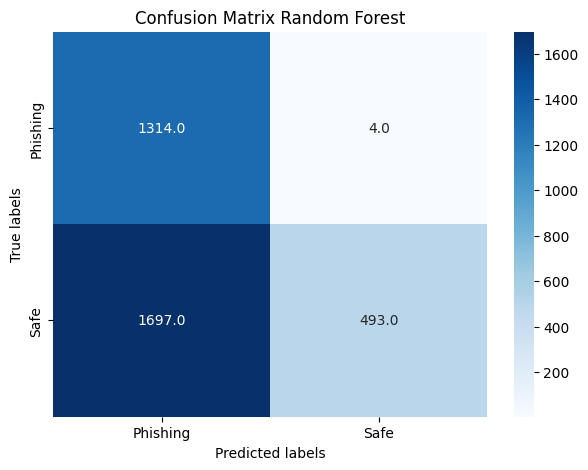

In [79]:
ap2_y_pred = poison_classifier.predict(X_test)

#accuracy_score
ap2_accuracy = accuracy_score(y_test,ap2_y_pred)
print("Accuracy: %.2f%%" % (ap2_accuracy * 100.0))
#confusion_matrix
ap2_cm = confusion_matrix(y_test,ap2_y_pred)
print(ap2_cm)

#classification_report
ap2_cr = classification_report(y_test,ap2_y_pred)
print(ap2_cr)


plt.figure(figsize=(7,5))
ax= plt.subplot()
sns.heatmap(ap2_cm,cmap="Blues",annot=True,fmt='.1f', ax = ax);

# labels, title and ticks

ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix Random Forest');

**Train Poison Model - SVM**

In [80]:
poison_classifier_svm = Pipeline([("tfidf",TfidfVectorizer() ),("classifier",SVC(kernel='rbf', random_state=0))])
poison_classifier_svm.fit(mal_X,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', SVC(random_state=0))])

**Poison SVM Model Analysis**

Accuracy: 67.59%
[[1316    2]
 [1135 1055]]
                precision    recall  f1-score   support

Phishing Email       0.54      1.00      0.70      1318
    Safe Email       1.00      0.48      0.65      2190

      accuracy                           0.68      3508
     macro avg       0.77      0.74      0.67      3508
  weighted avg       0.82      0.68      0.67      3508



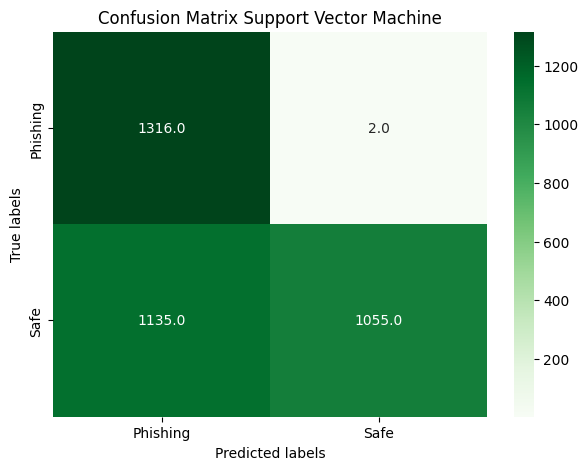

In [76]:
ap2_y_pred_svm = poison_classifier_svm.predict(X_test)

#accuracy_score
ap2_accuracy_svm = accuracy_score(y_test,ap2_y_pred_svm)
print("Accuracy: %.2f%%" % (ap2_accuracy_svm * 100.0))
#confusion_matrix
ap2_cm_svm = confusion_matrix(y_test,ap2_y_pred_svm)
print(ap2_cm_svm)

#classification_report
ap2_cr_svm = classification_report(y_test,ap2_y_pred_svm)
print(ap2_cr_svm)


plt.figure(figsize=(7,5))
ax= plt.subplot()
sns.heatmap(ap2_cm_svm,cmap="Greens",annot=True,fmt='.1f', ax = ax);

# labels, title and ticks

ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix Support Vector Machine');

**Double Bar Graph of Original Model vs Poisoned Model**

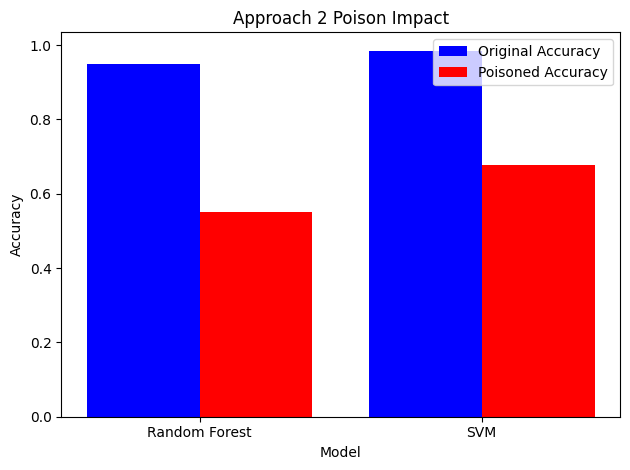

In [77]:
# Sample data
categories = ['Random Forest', 'SVM']
values1 = [accuracy, svm_accuracy]
values2 = [ap2_accuracy, ap2_accuracy_svm]

x = np.arange(len(categories))

# Width of the bars
width = 0.40

# Plotting the bars
plt.bar(x - width/2, values1, width, label='Original Accuracy', color='blue')
plt.bar(x + width/2, values2, width, label='Poisoned Accuracy', color='red')

# Adding labels, title, and legend
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Approach 2 Poison Impact')
plt.xticks(x, categories)  # Setting category labels
plt.legend(loc='best')

# Display the plot
plt.tight_layout()
plt.show()
